<a href="https://colab.research.google.com/github/MikeJoe9/Graph/blob/main/Stage_E_Quize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Time_series_analysis_STAGE_E_Dataset.csv")

In [6]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,01/09/2010 0:00,15.8,1688.21500,3.6900,23.710
1,01/09/2010 1:00,15.8,1669.19500,3.6900,22.635
2,01/09/2010 2:00,15.8,1491.98000,3.6900,22.565
3,01/09/2010 3:00,15.8,1330.76000,3.6900,18.910
4,01/09/2010 4:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,28/02/2021 19:00,24.3,449.63625,5.4848,117.925
92012,28/02/2021 20:00,24.3,815.59975,5.4848,87.880
92013,28/02/2021 21:00,24.3,745.12325,5.4848,62.060
92014,28/02/2021 22:00,24.3,694.95150,5.4848,62.000


In [7]:
# data shape
df.shape

(92016, 5)

In [9]:
# view missing values
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [12]:
print('='*30)

In [13]:
#Convert date column to date object
df["FullDate"] = pd.to_datetime(df["FullDate"])
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-01-09 00:00:00,15.8,1688.215,3.69,23.710
1,2010-01-09 01:00:00,15.8,1669.195,3.69,22.635
2,2010-01-09 02:00:00,15.8,1491.980,3.69,22.565
3,2010-01-09 03:00:00,15.8,1330.760,3.69,18.910
4,2010-01-09 04:00:00,15.8,1247.940,3.69,18.030


In [15]:
#Chang FullDate column to a date object
df["FullDate"] = pd.to_datetime(df["FullDate"])

In [16]:
df.set_index("FullDate",inplace=True)

In [17]:
df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-01-09 00:00:00,15.8,1688.21500,3.6900,23.710
2010-01-09 01:00:00,15.8,1669.19500,3.6900,22.635
2010-01-09 02:00:00,15.8,1491.98000,3.6900,22.565
2010-01-09 03:00:00,15.8,1330.76000,3.6900,18.910
2010-01-09 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [18]:
# change the sampling to a daily
df_daily = df.resample("D").sum()


In [19]:
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-01-09,379.2,41565.380,88.56,2751.700
2010-01-10,540.0,36279.965,82.80,501.820
2010-01-11,432.0,37717.490,54.48,549.280
2010-01-12,602.4,35906.165,58.32,519.655
2010-01-13,0.0,0.000,0.00,0.000


No 11

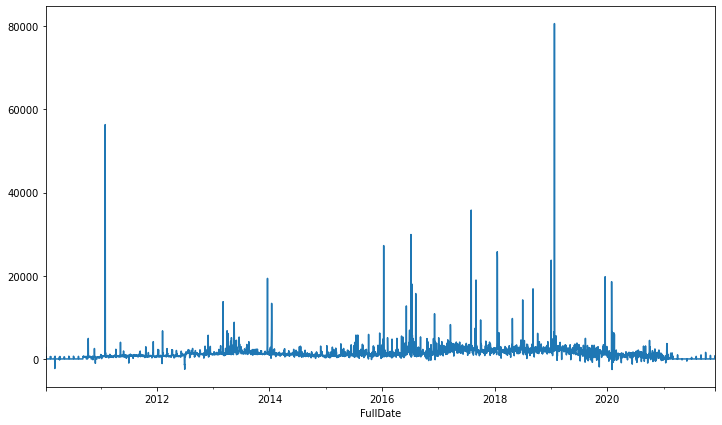

In [20]:
#Plot of ElecPrice vs time
plt.figure(figsize=(12,7))
df_daily["ElecPrice"].plot()

In [28]:
import statsmodels.tsa.stattools as sts
sys_p_value = sts.adfuller(df_daily["SysLoad"])[1]
gas_price_p_value = sts.adfuller(df_daily["GasPrice"])[1]
print("p value of system_load",np.round(sys_p_value,decimals=6))
print("p value of gas Price",np.round(gas_price_p_value,decimals=6))

p value of system_load 0.13081
p value of gas Price 0.535532


In [29]:
X = sts.adfuller(df_daily["SysLoad"])[4]["10%"]
Y = sts.adfuller(df_daily["ElecPrice"])[4]["5%"]
print("system at 10% critical val",np.round(X,decimals=4))
print("Elecprice at 5% critical val",np.round(Y,decimals=4))

system at 10% critical val -2.5671
Elecprice at 5% critical val -2.8622


# New Section Fbprophet

In [36]:
import prophet

In [30]:

df_daily.reset_index(drop=False,inplace=True)

In [31]:
df_daily = df_daily.rename(columns= {"FullDate": "ds", "ElecPrice": "y"})

In [32]:
df_daily.head(10)

,ds,Tmax,SysLoad,GasPrice,y
0,2010-01-09,379.2,41565.380,88.56,2751.700
1,2010-01-10,540.0,36279.965,82.80,501.820
2,2010-01-11,432.0,37717.490,54.48,549.280
3,2010-01-12,602.4,35906.165,58.32,519.655
4,2010-01-13,0.0,0.000,0.00,0.000
5,2010-01-14,0.0,0.000,0.00,0.000
6,2010-01-15,0.0,0.000,0.00,0.000
7,2010-01-16,0.0,0.000,0.00,0.000
8,2010-01-17,0.0,0.000,0.00,0.000
9,2010-01-18,0.0,0.000,0.00,0.000


In [33]:
#splitinting data into train and test
train = df_daily.iloc[:2756]
test  = df_daily.iloc[2757:]


In [34]:
test

,ds,Tmax,SysLoad,GasPrice,y
2757,2017-07-28,482.4,19959.18610,219.0192,2547.280
2758,2017-07-29,530.4,3537.85265,194.5320,2173.860
2759,2017-07-30,384.0,13029.37810,178.0800,2146.545
2760,2017-07-31,352.8,21880.05260,213.3120,2522.745
2761,2017-08-01,672.0,28760.99195,232.5600,2038.640
...,...,...,...,...,...
4341,2021-11-28,0.0,0.00000,0.0000,0.000
4342,2021-11-29,0.0,0.00000,0.0000,0.000
4343,2021-11-30,0.0,0.00000,0.0000,0.000
4344,2021-12-01,744.0,1152.36125,146.8800,781.870


In [35]:
train

,ds,Tmax,SysLoad,GasPrice,y
0,2010-01-09,379.2,41565.38000,88.5600,2751.700
1,2010-01-10,540.0,36279.96500,82.8000,501.820
2,2010-01-11,432.0,37717.49000,54.4800,549.280
3,2010-01-12,602.4,35906.16500,58.3200,519.655
4,2010-01-13,0.0,0.00000,0.0000,0.000
...,...,...,...,...,...
2751,2017-07-22,448.8,-3506.65730,213.5496,1331.805
2752,2017-07-23,408.0,8540.07055,208.6920,2456.705
2753,2017-07-24,456.0,27874.01015,195.6816,3000.225
2754,2017-07-25,400.8,8327.90605,204.3000,2318.240


In [38]:
model = prophet()
model.fit(train)
model.component_modes

TypeError: ignored